In [49]:
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [50]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Calculate differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    # Calculate distance
    distance = R * c
    return distance

# Example usage
lat1 = 52.2296756
lon1 = 21.0122287
lat2 = 52.406374
lon2 = 16.9251681

distance = haversine(lat1, lon1, lat2, lon2)
print("Distance:", distance, "km")

Distance: 278.4581750754194 km


In [51]:
def euclidean_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Earth radius in kilometers
    R = 6371
    
    # Convert latitude and longitude to Cartesian coordinates
    x1 = R * math.cos(lat1_rad) * math.cos(lon1_rad)
    y1 = R * math.cos(lat1_rad) * math.sin(lon1_rad)
    z1 = R * math.sin(lat1_rad)
    
    x2 = R * math.cos(lat2_rad) * math.cos(lon2_rad)
    y2 = R * math.cos(lat2_rad) * math.sin(lon2_rad)
    z2 = R * math.sin(lat2_rad)
    
    # Calculate Euclidean distance
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    
    return distance

# Coordinates
lat1 = 52.2296756
lon1 = 21.0122287
lat2 = 52.406374
lon2 = 16.9251681

# Calculate Euclidean distance
distance = euclidean_distance(lat1, lon1, lat2, lon2)
print("Euclidean distance:", distance, "km")

Euclidean distance: 278.436011332943 km


In [52]:
distance_haversine = haversine(40.7128, -74.0060, 34.0522, -118.2437)
print("Haversine distance:", distance_haversine, "km")
distance_euclidean = euclidean_distance(40.7128, -74.0060, 34.0522, -118.2437)
print("Euclidean distance:", distance_euclidean, "km")

Haversine distance: 3935.746254609723 km
Euclidean distance: 3873.461342615779 km


In [53]:
data = pd.read_excel("swainson's hawk.xlsx")
data.head()

,species,birdID,date,longitude,latitude
0,Swainson's hawk,SW16,1996-10-08,-98.184,28.840
1,Swainson's hawk,SW16,1996-10-09,-98.877,29.120
2,Swainson's hawk,SW16,1996-10-10,-99.299,25.879
3,Swainson's hawk,SW16,1996-10-11,-98.326,22.770
4,Swainson's hawk,SW16,1996-10-12,-96.021,17.831


In [54]:
df= pd.read_excel("swainson's hawk.xlsx")
df['date'] = pd.to_datetime(df['date'])
df.head()

,species,birdID,date,longitude,latitude
0,Swainson's hawk,SW16,1996-10-08,-98.184,28.840
1,Swainson's hawk,SW16,1996-10-09,-98.877,29.120
2,Swainson's hawk,SW16,1996-10-10,-99.299,25.879
3,Swainson's hawk,SW16,1996-10-11,-98.326,22.770
4,Swainson's hawk,SW16,1996-10-12,-96.021,17.831


In [55]:
def migratory_stretch_estimator(df, Azimuthal=True, save=False):
    # Calculate distance and time difference for each bird ID
    result_data = []

    # Iterate over each unique bird ID
    for bird_id, group_df in df.groupby('birdID'):
        first_entry = True
        # Calculate distance and time difference for each row in the group
        for index, row in group_df.iterrows():
            if first_entry:
                prev_longitude = row['longitude']
                prev_latitude = row['latitude']
                prev_date = row['date']
                first_entry = False
            else:
                if Azimuthal: distance = haversine(row['longitude'], row['latitude'], prev_longitude, prev_latitude)
                else:         distance = euclidean_distance(row['longitude'], row['latitude'], prev_longitude, prev_latitude)

                time_difference = (row['date'] - prev_date).days
                
                result_data.append({
                    'birdID': bird_id,
                    'distance': distance,
                    'time': time_difference
                })
                
                # Update previous values for the next iteration
                prev_longitude = row['longitude']
                prev_latitude = row['latitude']
                prev_date = row['date']

    # Create a new DataFrame from the result data
    result_df = pd.DataFrame(result_data)

    if save:
        result_df.to_excel(save + ".xlsx", index=False)

    return result_df

In [56]:
SWH_dist = migratory_stretch_estimator(df, save="SWH_dist")
SWH_dist

,birdID,distance,time
0,SW16,77.196132,1
1,SW16,73.753169,1
2,SW16,120.422288,1
3,SW16,265.087782,1
4,SW16,1272.416610,9
...,...,...,...
158,SW25,483.053535,6
159,SW25,419.507241,7
160,SW25,1550.947945,6
161,SW25,1504.535960,7


In [57]:
migratory_stretch_estimator(df, Azimuthal=False)

,birdID,distance,time
0,SW16,77.195659,1
1,SW16,73.752757,1
2,SW16,120.420495,1
3,SW16,265.068660,1
4,SW16,1270.302902,9
...,...,...,...
158,SW25,482.937837,6
159,SW25,419.431459,7
160,SW25,1547.121077,6
161,SW25,1501.042317,7


In [58]:
SWH_dist[SWH_dist['time'] < 3]['distance'].max()

675.1700475638635

In [60]:
def plot_bin_series(ser, fig_size=(10,6)):
    # Define the bin edges
    bin_edges = list(range(0, int(ser.max()) + 10, 10))

    # Discretize the data into bins
    binned_data = pd.cut(ser, bins=bin_edges, right=False)

    # Count the occurrences of each bin
    bin_counts = binned_data.value_counts().sort_index()

    # Plot the binned data
    bin_counts.plot(kind='bar', width=1, color='skyblue', edgecolor='black', figsize=fig_size)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Series Plot in Bins of 10')
    plt.show()

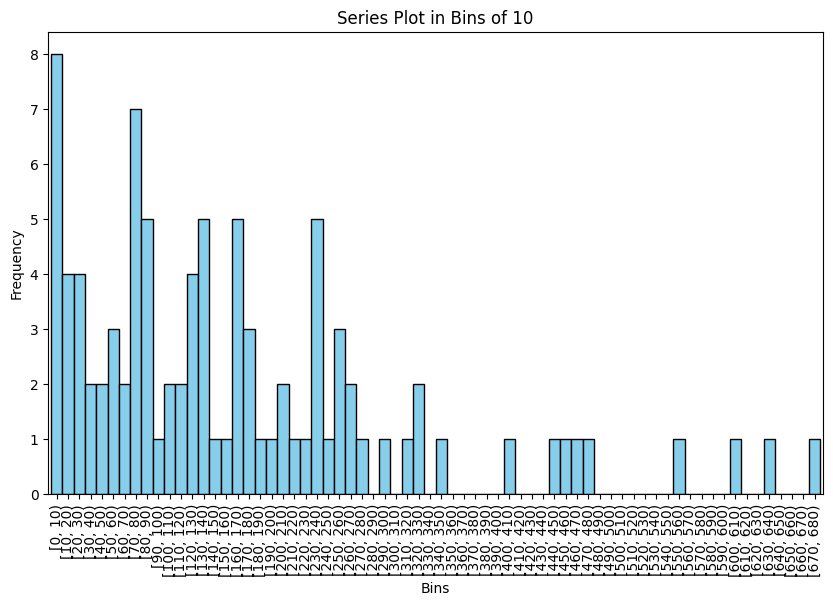

In [61]:
plot_bin_series(ser = SWH_dist[SWH_dist['time'] < 3]['distance'])

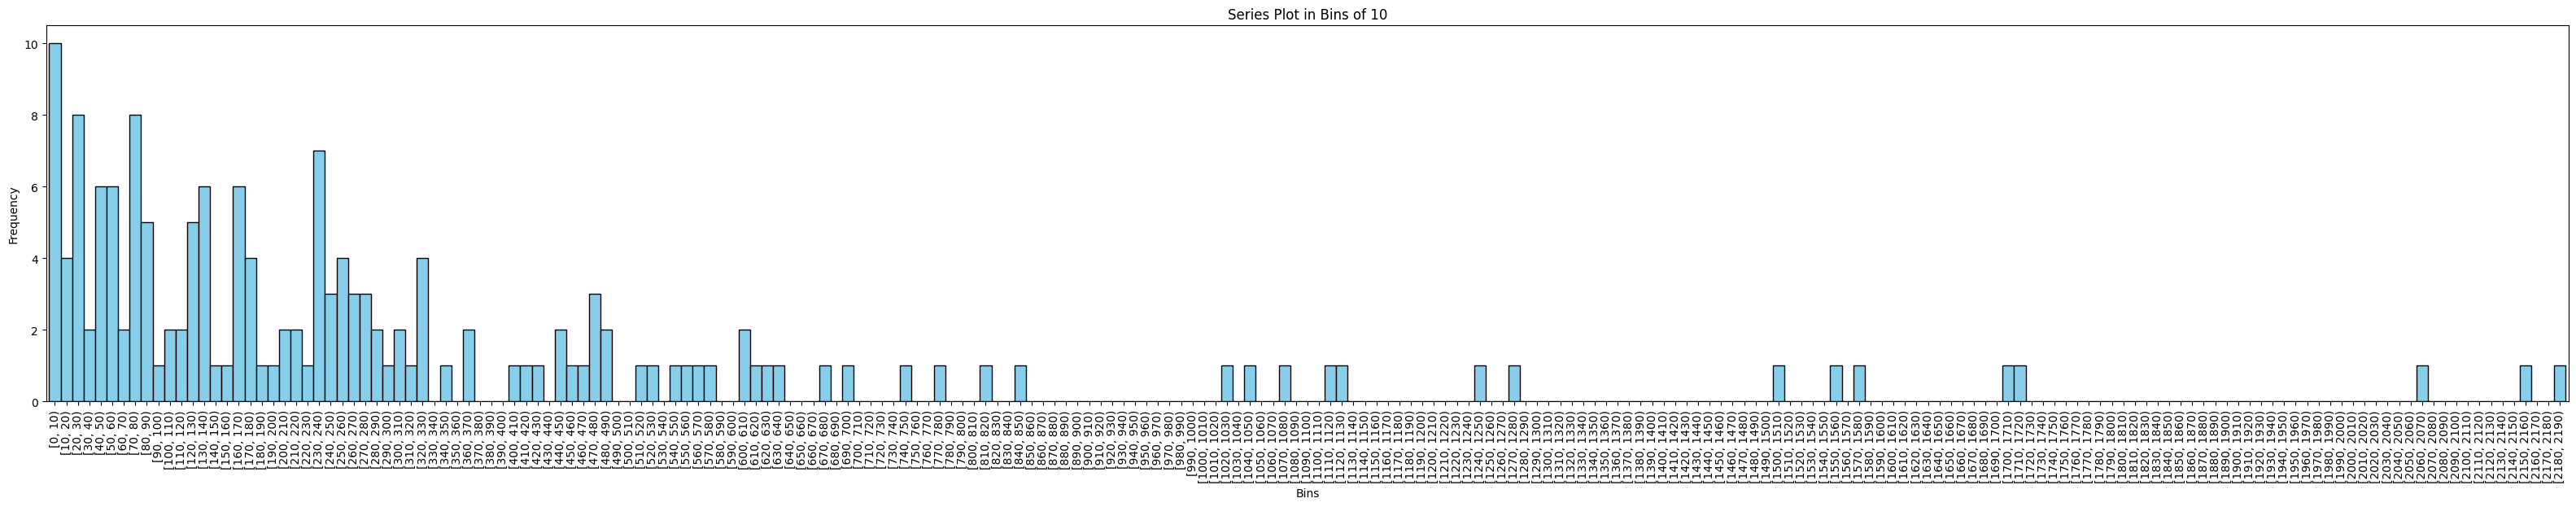

In [62]:
plot_bin_series(ser = SWH_dist['distance'], fig_size=(40,6))

In [63]:
# SWH_dist[SWH_dist['distance'] < 676].to_excel("sf.xlsx", index=False)

SWH_dist[SWH_dist['distance'] < 676]['distance'].median()

164.6042245086196

In [64]:
SWH_dist[SWH_dist['distance'] < 676]['distance'].mean()

204.56065097571147

In [65]:
SWH_dist['distance'].sort_values()[:5]

125    0.679393
128    1.497091
77     2.026144
151    2.745103
83     5.004273
Name: distance, dtype: float64

In [60]:
SWH_dist[SWH_dist['distance'] >= 676]#[SWH_dist['time'] >= 3]

,birdID,distance,time
4,SW16,1272.416610,9
18,SW16,745.058228,5
27,SW16,1075.535599,6
30,SW16,2159.877381,11
31,SW16,2186.527844,35
62,SW17,815.487497,6
66,SW17,1576.392305,6
67,SW17,1247.573043,6
68,SW17,2069.407950,12
107,SW18,1029.494314,12


In [66]:
SWH_migratory_stretch = 676
SWH_median_migration = 165
SWH_mean_migration = 205

In [67]:
def create_migration_network(data, max_migration):
    groups = []
    for bird_id, group_df in data.groupby('birdID'):
        groups.append(group_df)

    """
    Create a migration network graph based on groups of bird movements.
    
    Parameters:
        - groups: A list of DataFrame groups, each containing longitude and latitude columns for a bird's movements.
        - max_migration: Maximum migration distance in kilometers to consider for creating additional edges.
        
    Returns:
        A NetworkX graph representing the migration network.
    """
    # Create an empty graph
    migration_network = nx.Graph()

    # Iterate over each group of bird movements
    for bird_group in groups:
        # Extract latitude and longitude coordinates for the bird's movements
        points = list(zip(bird_group['latitude'], bird_group['longitude']))
        
        # Add edges based on the original connections
        for i in range(len(points) - 1):
            migration_network.add_edge(points[i], points[i + 1])

    # Iterate again to add additional edges based on maximum migration distance
    all_nodes = migration_network.nodes()
    for node1 in all_nodes:
        for node2 in all_nodes:
            if node1 != node2:
                # Calculate distance between two nodes using Haversine formula
                distance = haversine(node1[0], node1[1], node2[0], node2[1])
                # If distance is less than max_migration, add an edge between the two nodes
                if distance < max_migration:
                    migration_network.add_edge(node1, node2)

    return migration_network

In [68]:
SWH_network = create_migration_network(data, SWH_migratory_stretch)

In [44]:
print(SWH_network)

Graph with 167 nodes and 1566 edges


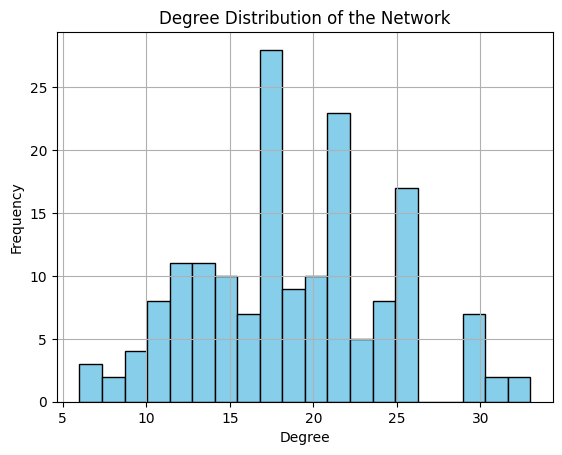

In [69]:
degrees = dict(SWH_network.degree())
# Plot degree distribution
plt.hist(list(degrees.values()), bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution of the Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [88]:
def plot_migration_network_on_world_map(migration_network):
    """
    Plot the migration network on a world map using latitude and longitude values for node positions.
    
    Parameters:
        - migration_network: NetworkX graph representing the migration network.
    """
    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Create a Basemap instance for world map projection
    m = Basemap(projection='mill', llcrnrlat=-40, urcrnrlat=45, llcrnrlon=-130, urcrnrlon=-40)

    # Draw coastlines, countries, and states
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Draw meridians and parallels
    m.drawmeridians(range(-180, 181, 30), labels=[0,0,0,1], fontsize=10)
    m.drawparallels(range(-90, 91, 30), labels=[1,0,0,0], fontsize=10)

    # Convert latitude and longitude coordinates to map coordinates
    pos = {node: m(node[1], node[0]) for node in migration_network.nodes()}

    # Draw nodes
    nx.draw_networkx_nodes(migration_network, pos, node_size=10, node_color='blue', alpha=0.5)

    # Draw edges
    nx.draw_networkx_edges(migration_network, pos, width=0.5, alpha=0.5)

    plt.title('Migration Network on World Map')
    plt.show()

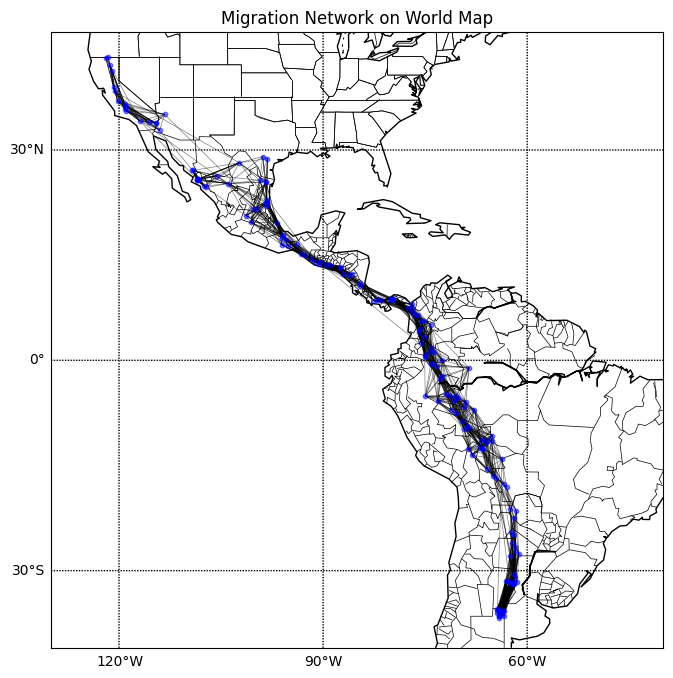

In [46]:
plot_migration_network_on_world_map(SWH_network)

In [27]:
def estimate_k_bisection(d_prime, tolerance=0.01, max_iterations=1000):
    # Define the function f(d) = e^-kd
    def f(d, k):
        return math.exp(-k * d)
    
    # Define the target value
    target_value = 0.5
    
    # Define the initial bounds for k
    lower_bound = 0
    upper_bound = 1
    # lies in 0 to 1 since k has dimension (km)^-1
    
    # Perform bisection search
    iterations = 0
    while iterations < max_iterations:
        # Calculate the midpoint and the corresponding function value
        midpoint = (lower_bound + upper_bound) / 2
        result = f(d_prime, midpoint)
        
        # Check if the result is within tolerance of the target value
        if abs(result - target_value) < tolerance:
            return midpoint
        
        # Update the bounds based on the sign of the result
        if result < target_value:
            upper_bound = midpoint
        else:
            lower_bound = midpoint
        
        iterations += 1
    
    # If max_iterations is reached without convergence, return None
    return None

In [42]:
k_SWH = estimate_k_bisection(SWH_median_migration)
print("Estimated value of Dispersal Constant, k:", k_SWH)

n_SWH = df["birdID"].nunique()
print("No. of Swainson's Hawk, n :", n_SWH)

Estimated value of Dispersal Constant, k: 0.004150390625
No. of Swainson's Hawk, n : 4


In [44]:
#  p ( d )  is the probability of dispersing at least distance d, and k is the dispersal coefficient
def p(d, k):
    return math.exp(-k * d)

print(p(SWH_median_migration, k_SWH))
print(p(SWH_median_migration, 1/SWH_mean_migration))

print(p(SWH_migratory_stretch, k_SWH))
print(p(SWH_migratory_stretch, 1/SWH_mean_migration))

# max dist
print(p(2186, k_SWH))
print(p(2186, 1/SWH_mean_migration))

# min dist
print(p(0.68, k_SWH))
print(p(0.68, 1/SWH_mean_migration))

0.504183770619497
0.4471424528019328
0.060466604233003825
0.03697323614139773
0.00011475009211830982
2.3385026486803328e-05
0.9971817132226273
0.9966884222385741


In [45]:
def weight_of_edge(n, k, d):
    return n * p(d, k)

In [77]:
edges = list(SWH_network.edges())[:2]
for u, v in edges:
    print(SWH_network[u][v])

{}
{}


In [78]:
for u, v in SWH_network.edges():
    # Assuming you have distance d between nodes u and v
    # Calculate the weight of the edge using the custom function
    weight = weight_of_edge(n_SWH, k_SWH, haversine(u[0], u[1], v[0], v[1]))
    
    # Assign the weight as an attribute to the edge
    SWH_network[u][v]['weight'] = weight

In [85]:
edges = list(SWH_network.edges())[:10]
for u, v in edges:
    print(SWH_network[u][v]["weight"], end = " , ")

2.939145780107299 , 0.9468813787667262 , 0.24276890047096933 , 0.28341687735655735 , 0.7342132108791013 , 0.913188179939009 , 0.9234597147892838 , 0.2520353482918762 , 0.8874768017542713 , 0.24659404604061438 , 

In [128]:
def plot_weighted_migration_network_on_world_map(migration_network):
    """
    Plot the migration network on a world map using latitude and longitude values for node positions.
    
    Parameters:
        - migration_network: NetworkX graph representing the migration network.
    """
    # Create a new figure
    plt.figure(figsize=(10, 20))

    # Create a Basemap instance for world map projection
    m = Basemap(projection='mill', llcrnrlat=-40, urcrnrlat=45, llcrnrlon=-130, urcrnrlon=-58)

    # Draw coastlines, countries, and states with reduced opacity
    m.drawcoastlines(linewidth=0.2)
    m.drawcountries(linewidth=0.2)
    m.drawstates(linewidth=0.2)

    # Draw meridians and parallels
    m.drawmeridians(range(-180, 181, 30), labels=[0,0,0,1], fontsize=10)
    m.drawparallels(range(-90, 91, 30), labels=[1,0,0,0], fontsize=10)

    # Convert latitude and longitude coordinates to map coordinates
    pos = {node: m(node[1], node[0]) for node in migration_network.nodes()}
    
    # Create color maps for edges and nodes based on weight and degree ranges
    edge_colors = ['#ff9896', '#ffbb78', '#ffff99', '#c5e1a5', '#9edae5', '#aec7e8']  # Define colors for edge weight ranges
    degree_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Define colors for node degree ranges
    
    # Define edge weight ranges and corresponding labels
    edge_weight_ranges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, float('inf'))]
    edge_labels = [f'{start}-{end}' if end != float('inf') else f'>{start}' for start, end in edge_weight_ranges]
    
    # Define node degree ranges and corresponding labels
    node_degree_ranges = [(5, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31, 35)]
    degree_labels = [f'{start}-{end}' for start, end in node_degree_ranges]
    
    # Draw nodes
    for node, degree in migration_network.degree():
        # Assign node size based on degree
        node_size = 2 * degree
        
        # Assign color based on node degree range
        for i, (start, end) in enumerate(node_degree_ranges):
            if start <= degree <= end:
                node_color = degree_colors[i]
                break
        
        nx.draw_networkx_nodes(migration_network, pos, nodelist=[node], node_size=node_size, node_color=node_color, alpha=0.5)
    
    # Draw edges
    for edge in migration_network.edges():
        # Get edge weight
        weight = migration_network[edge[0]][edge[1]].get('weight', 1000)
        
        # Assign color based on edge weight range
        for i, (start, end) in enumerate(edge_weight_ranges):
            if start <= weight < end:
                edge_color = edge_colors[i]
                break
        
        nx.draw_networkx_edges(migration_network, pos, edgelist=[edge], width=weight + 1, edge_color=edge_color, alpha=0.5)
    
    # Draw legend for edge colors
    edge_legend = [(color, label) for label, color in zip(edge_labels, edge_colors)]
    plt.legend(edge_legend, title='Edge Weights', loc='upper left', fontsize='small')
    
    # Draw legend for node degrees
    degree_legend = [(color, label) for label, color in zip(degree_labels, degree_colors)]
    plt.legend(degree_legend, title='Node Degrees', loc='upper right', fontsize='small')

    plt.title('Migration Network on World Map')
    plt.show()

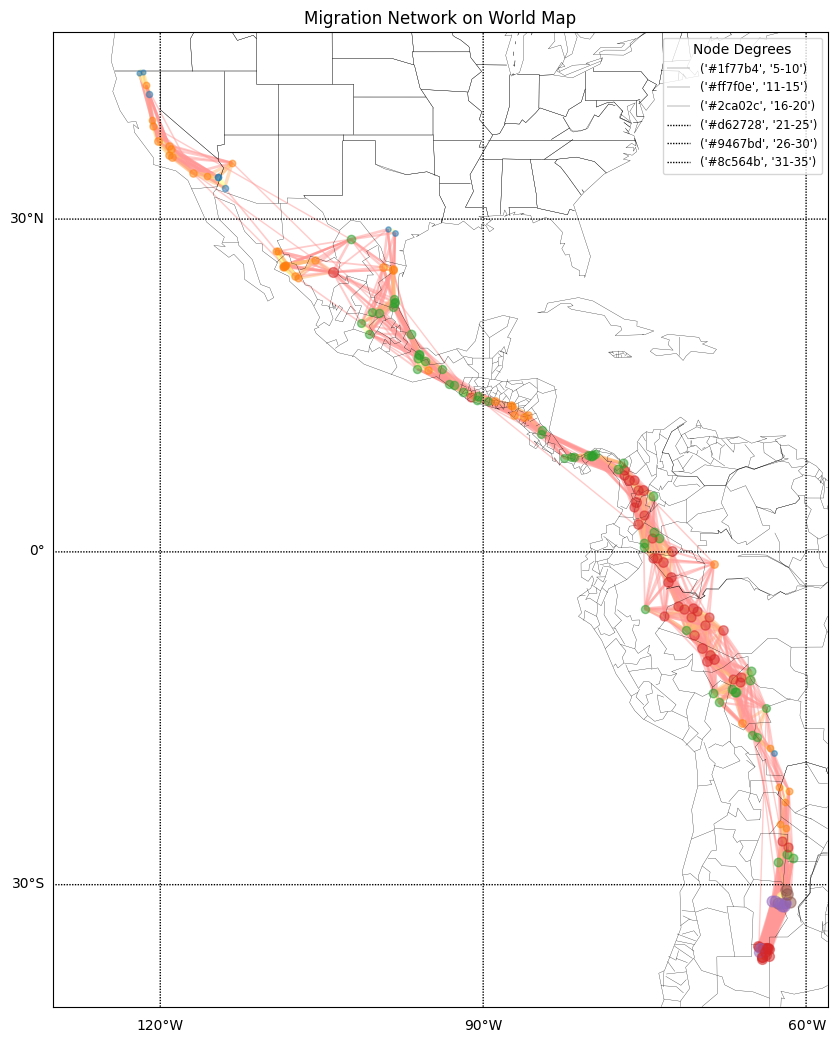

In [129]:
plot_weighted_migration_network_on_world_map(SWH_network)